In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/SQL/project DSA/dataset.csv")

<ipython-input-2-f9e505b2ab5f>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/SQL/project DSA/dataset.csv")


In [3]:
data=df.copy()

In [4]:
df.shape

(958524, 45)

In [5]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include=['object'])
print(f"Numerical columns={df_num.columns}")
print(f"\nCategorical columns={df_cat.columns}")

Numerical columns=Index(['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch',
       'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'],
      dtype='object')

Categorical columns=Index(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id',
       'equinox', 'class'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [10]:
df.tail()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000,7.433000,46.311000,27.383000,1.041200e+00,1.652100e-01,130.970000,726.490000,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,0.000016,0.000056,0.000238,0.000130,2.418900e-08,3.346100e-09,0.000469,0.000016,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,0.000019,0.000057,0.000090,0.000053,1.650100e-07,1.101600e-08,0.000283,0.000091,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,0.544880,4.391600,18.988000,10.838000,7.171600e-01,1.016700e-01,38.984000,503.550000,MBA,0.25641
958523,bT3S2678,3246553,(2678 T-3),2678 T-3,NaN,NaN,N,N,18.060,NaN,NaN,NaN,JPL 3,2443429.5,43429,19771013.0,J2000,0.258348,2.260404,1.676433,9.661947,204.512448,148.496988,15.320134,2.844376,0.290018,2.443377e+06,1.977082e+07,1241.302609,3.398501,0.680220,264.721217,1.486800e-02,1.292700e-01,6.252600e-02,1.102300,0.311700,1.284300,0.473610,1.626700e-01,2.487900e-02,5.523600,106.480000,MBA,0.26980


In [11]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [12]:
# Number of unique values for each column
nunique_values = df.nunique()
print("\nNumber of unique values for each column:")
print(nunique_values)


Number of unique values for each column:
id                958524
spkid             958524
full_name         958524
pdes              958524
name               22064
prefix                 1
neo                    2
pha                    2
H                   9489
diameter           16591
albedo              1057
diameter_sigma      3054
orbit_id            4690
epoch               5246
epoch_mjd           5246
epoch_cal           5246
equinox                1
e                 958444
a                 958509
q                 958509
i                 958414
om                958518
w                 958519
ma                958519
ad                958505
n                 958514
tp                958519
tp_cal            958499
per               958510
per_y             958511
moid              314300
moid_ld           314301
sigma_e           254740
sigma_a           273297
sigma_q           248138
sigma_i           215741
sigma_om          223155
sigma_w           262719
sigma_ma

In [13]:
# Unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}
print("Unique values for each column:\n")
for col, values in unique_values.items():
    print(f"{col}: {values}\n\n")

Unique values for each column:

id: ['a0000001' 'a0000002' 'a0000003' ... 'bPLS6344' 'bT2S2060' 'bT3S2678']


spkid: [2000001 2000002 2000003 ... 3013075 3246457 3246553]


full_name: ['     1 Ceres' '     2 Pallas' '     3 Juno' ... '       (6344 P-L)'
 '       (2060 T-2)' '       (2678 T-3)']


pdes: [1 2 3 ... '6344 P-L' '2060 T-2' '2678 T-3']


name: ['Ceres' 'Pallas' 'Juno' ... 'Bryanshumaker' 'Guman' "'Oumuamua"]


prefix: [nan 'A']


neo: ['N' 'Y' nan]


pha: ['N' 'Y' nan]


H: [ 3.4    4.2    5.33  ... 21.51  26.98  26.419]


diameter: [9.39400e+02 5.45000e+02 2.46596e+02 ... 1.22000e-01 6.51000e-01
 1.07700e+00]


albedo: [0.09  0.101 0.214 ... 0.009 0.004 0.007]


diameter_sigma: [2.0000e-01 1.8000e+01 1.0594e+01 ... 5.0000e-04 3.3150e+00 2.2140e+00]


orbit_id: ['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']


epoch: [2458600.5 2459000.5 2455926.5 ... 2437204.5 2441956.5 2443429.5]


epoch_mjd: [58600 59000 55926 ... 37204 41956 43429]


epoch_cal: [201904

In [14]:
# Value counts for each column
value_counts = {col: df[col].value_counts() for col in df.columns}
print("\nValue counts for each column:")
for col, counts in value_counts.items():
    print(f"\n{col}:\n{counts}")


Value counts for each column:

id:
id
a0000001    1
bK08RF2H    1
bK08RF1V    1
bK08RF1W    1
bK08RF1X    1
           ..
a0319513    1
a0319514    1
a0319515    1
a0319516    1
bT3S2678    1
Name: count, Length: 958524, dtype: int64

spkid:
spkid
2000001    1
3917864    1
3917890    1
3917892    1
3917894    1
          ..
2319513    1
2319514    1
2319515    1
2319516    1
3246553    1
Name: count, Length: 958524, dtype: int64

full_name:
full_name
     1 Ceres           1
       (2008 RH152)    1
       (2008 RV151)    1
       (2008 RW151)    1
       (2008 RX151)    1
                      ..
319513 (2006 QR148)    1
319514 (2006 QX156)    1
319515 (2006 QC163)    1
319516 (2006 QV169)    1
       (2678 T-3)      1
Name: count, Length: 958524, dtype: int64

pdes:
pdes
1             1
2008 RH152    1
2008 RV151    1
2008 RW151    1
2008 RX151    1
             ..
319513        1
319514        1
319515        1
319516        1
2678 T-3      1
Name: count, Length: 958524, dtype: int

In [15]:
#missing values for each column
data.isnull().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,936460
prefix,958506
neo,4
pha,19921
H,6263
diameter,822315


In [16]:
df['pha'].value_counts()

,count
pha,
N,936537
Y,2066


In [17]:
df['pha'].value_counts(normalize=True)

,proportion
pha,
N,0.997799
Y,0.002201


It' highly imbalanced.

In [18]:
df[df['neo']=='Y']['pha'].value_counts(normalize=True)*100

,proportion
pha,
N,90.975802
Y,9.024198


All phas are neos , while only 9% of neos comprise phas

In [19]:
df[df['prefix']=='A']['pha'].value_counts(normalize=True)*100

,proportion
pha,
N,100.0


In [20]:
df_pha_y = df[df['pha'] == 'Y']

#count 'pha'='Y' for each 'prefix' value, including NaN
prefix_pha_y_counts = df_pha_y.groupby(df_pha_y['prefix'].fillna('NaN')).size()
print("Number of 'pha' = 'Y' for each prefix value (including NaN):")
print(prefix_pha_y_counts)

Number of 'pha' = 'Y' for each prefix value (including NaN):
prefix
NaN    2066
dtype: int64


All 'A' prefixes are pha_no.

Since only missing values in prefix column contribute to pha_yes. It's an irrelevant column

In [21]:
# df_pha_y = df[df['pha'] == 'Y']

class_pha_y_counts = df_pha_y.groupby('class').size()
class_pha_y_counts = class_pha_y_counts.sort_values(ascending=False)

print("Number of 'pha' = 'Y' for each class:")
print(class_pha_y_counts)


Number of 'pha' = 'Y' for each class:
class
APO    1768
ATE     174
AMO     118
IEO       6
dtype: int64


> Only 4 major classes are there in column 'class' that determine whether an asteroid is pha or not.






In [22]:
orbit_id_pha_y_counts = df_pha_y.groupby('orbit_id').size()
orbit_id_pha_y_counts = orbit_id_pha_y_counts.sort_values(ascending=False)

print("Number of 'pha' = 'Y' for each orbit_id:")
print(orbit_id_pha_y_counts)


Number of 'pha' = 'Y' for each orbit_id:
orbit_id
18         48
19         45
17         42
15         41
32         39
           ..
JPL 229     1
JPL 222     1
JPL 221     1
79          1
215         1
Length: 328, dtype: int64


# Data Cleaning

In [23]:
df.duplicated().sum()  #no duplicates

0

Columns such as ' id ' ,' spkid ' , ' full_name ' , 'pdes ' , ' name ' consist of unique ids and doesn't hold any significance in prediction .Hence it can be dropped


Columns such as 'prefix','equinox' contain a singular value and do not hold any significance in prediction.Hence can be dropped

In [24]:
df2=df.drop(columns=['id','spkid','full_name','pdes','name','prefix','equinox'])

In [25]:
#Reducing number of rows that gives pha_N to minimise the huge imalance within column,that might effect performance of the model.

df2['pha'] = df2['pha'].astype(str)

yes_df = df2[df2['pha'] == 'Y']
no_df = df2[df2['pha'] == 'N']

no_df['missing_values'] = no_df.isnull().sum(axis=1)

no_df_sorted = no_df.sort_values(by='missing_values', ascending=False)

num_to_remove = min(920000, len(no_df_sorted))
print(f"\n\nNumber of rows to remove: {num_to_remove}")

rows_to_remove = no_df_sorted.head(num_to_remove)

no_df_remaining = no_df_sorted.drop(rows_to_remove.index)

no_df_remaining = no_df_remaining.drop(columns=['missing_values'])

result_df = pd.concat([yes_df, no_df_remaining])

result_df.reset_index(drop=True, inplace=True)

print(f"\n\nResulting DataFrame Shape: {result_df.shape}")

<ipython-input-25-807227b85932>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_df['missing_values'] = no_df.isnull().sum(axis=1)




Number of rows to remove: 920000


Resulting DataFrame Shape: (18603, 38)


In [26]:
# result_df.shape

In [27]:
result_df['pha'].value_counts(normalize=True)*100

,proportion
pha,
N,88.894264
Y,11.105736


In [28]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18603 entries, 0 to 18602
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neo             18603 non-null  object 
 1   pha             18603 non-null  object 
 2   H               18603 non-null  float64
 3   diameter        16758 non-null  float64
 4   albedo          16737 non-null  float64
 5   diameter_sigma  16726 non-null  float64
 6   orbit_id        18603 non-null  object 
 7   epoch           18603 non-null  float64
 8   epoch_mjd       18603 non-null  int64  
 9   epoch_cal       18603 non-null  float64
 10  e               18603 non-null  float64
 11  a               18603 non-null  float64
 12  q               18603 non-null  float64
 13  i               18603 non-null  float64
 14  om              18603 non-null  float64
 15  w               18603 non-null  float64
 16  ma              18603 non-null  float64
 17  ad              18603 non-null 

In [29]:
result_df.isna().sum()

,0
neo,0
pha,0
H,0
diameter,1845
albedo,1866
diameter_sigma,1877
orbit_id,0
epoch,0
epoch_mjd,0
epoch_cal,0


Now, diameter ,albedo and diameter_sigma contain missing values

In [30]:
result_df.isna().sum()/result_df.shape[0]*100

,0
neo,0.000000
pha,0.000000
H,0.000000
diameter,9.917755
albedo,10.030640
diameter_sigma,10.089770
orbit_id,0.000000
epoch,0.000000
epoch_mjd,0.000000
epoch_cal,0.000000


In [31]:
result_df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id',
       'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma',
       'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms'],
      dtype='object')

In [32]:
result_df_num=result_df.select_dtypes(include=['int64','float64'])
result_df_cat=result_df.select_dtypes(include=['object'])
print(f"Numerical columns={result_df_num.columns}")
print(f"\nCategorical columns={result_df_cat.columns}")

Numerical columns=Index(['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd',
       'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a',
       'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad',
       'sigma_n', 'sigma_tp', 'sigma_per', 'rms'],
      dtype='object')

Categorical columns=Index(['neo', 'pha', 'orbit_id', 'class'], dtype='object')


# EDA

In [33]:
df_test=result_df.copy()
df_test.head()

,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,Y,Y,16.90,1.00,0.51,NaN,107,2459000.5,59000,20200531.0,0.827021,1.078169,0.186500,22.822113,87.997544,31.393344,192.083181,1.969838,0.880387,2.459191e+06,2.020121e+07,408.910857,1.119537,0.034245,13.327010,3.637100e-08,2.817900e-09,3.916900e-08,0.000013,0.000004,0.000007,0.000006,5.148400e-09,3.451500e-09,0.000008,1.603100e-06,APO,0.33228
1,Y,Y,15.30,2.56,0.29,0.15,JPL 609,2459000.5,59000,20200531.0,0.335455,1.245667,0.827802,13.337043,337.186975,276.956068,235.112642,1.663532,0.708926,2.459177e+06,2.020112e+07,507.810053,1.390308,0.030353,11.812672,1.132300e-08,1.588400e-10,1.417100e-08,0.000003,0.000003,0.000003,0.000003,2.121200e-10,1.355900e-10,0.000004,9.712800e-08,APO,0.40639
2,Y,Y,16.25,1.50,0.25,NaN,JPL 308,2459000.5,59000,20200531.0,0.559917,1.470345,0.647074,6.354732,35.627131,285.975958,88.546479,2.293616,0.552809,2.458840e+06,2.019122e+07,651.219646,1.782942,0.025814,10.046073,1.318500e-08,8.299600e-10,1.956000e-08,0.000003,0.000024,0.000025,0.000003,1.294700e-09,4.680600e-10,0.000006,5.513800e-07,APO,0.48568
3,Y,Y,15.20,3.40,NaN,NaN,JPL 195,2459000.5,59000,20200531.0,0.650352,1.776503,0.621152,39.829591,356.864043,267.822978,312.736110,2.931855,0.416251,2.459114e+06,2.020092e+07,864.863110,2.367866,0.003568,1.388457,2.410700e-08,2.773900e-09,4.320700e-08,0.000008,0.000002,0.000005,0.000002,4.577900e-09,9.749200e-10,0.000004,2.025600e-06,APO,0.39337
4,Y,Y,18.80,0.60,NaN,NaN,JPL 39,2459000.5,59000,20200531.0,0.763997,1.874841,0.442468,1.322476,349.486273,43.608203,336.157322,3.307214,0.383935,2.459063e+06,2.020080e+07,937.659578,2.567172,0.011589,4.510052,6.704800e-08,1.405300e-09,1.255300e-07,0.000010,0.000430,0.000430,0.000011,2.478900e-09,4.316600e-10,0.000029,1.054200e-06,APO,0.73830


**Box-Plot**

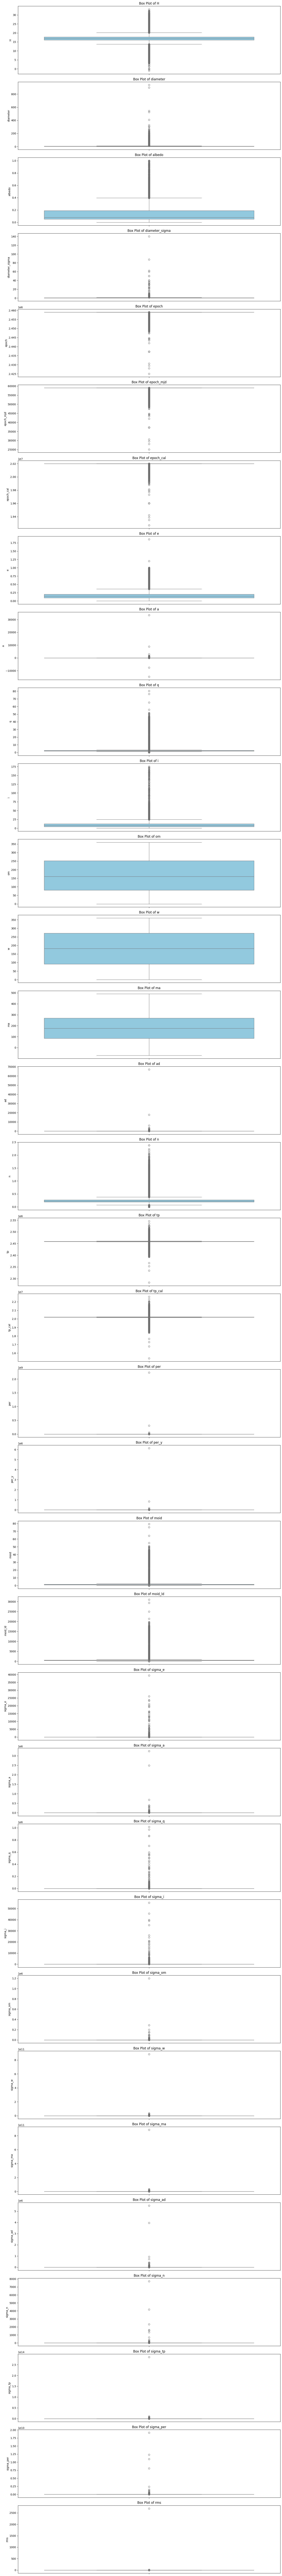

In [34]:
numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_columns) * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


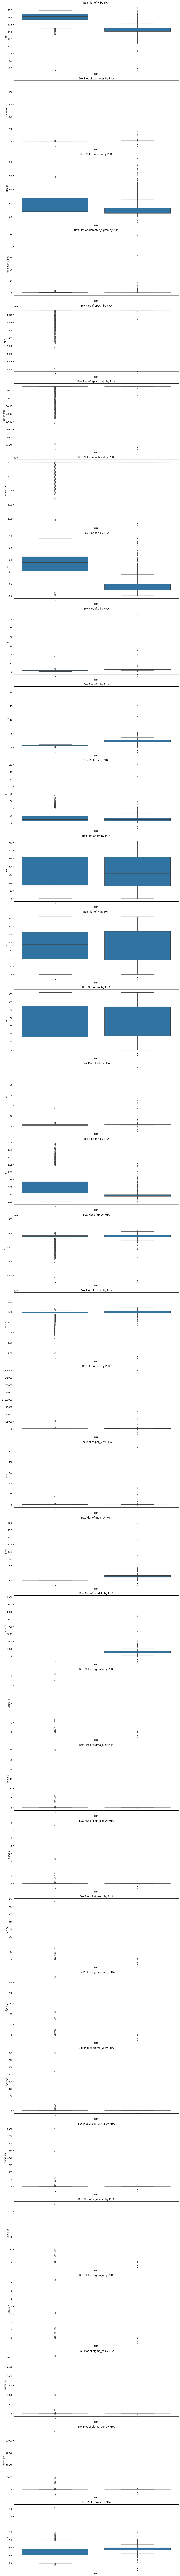

In [35]:
numerical_columns = result_df.select_dtypes(include=['int64', 'float64']).columns
num_vars = len(numerical_columns)

fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(12, 5 * num_vars))

for i, var in enumerate(numerical_columns):
    sns.boxplot(x='pha', y=result_df[var], data=result_df, ax=axes[i])
    axes[i].set_xlabel('PHA')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Box Plot of {var} by PHA')

plt.tight_layout()
plt.show()


**Correlation Matrix**

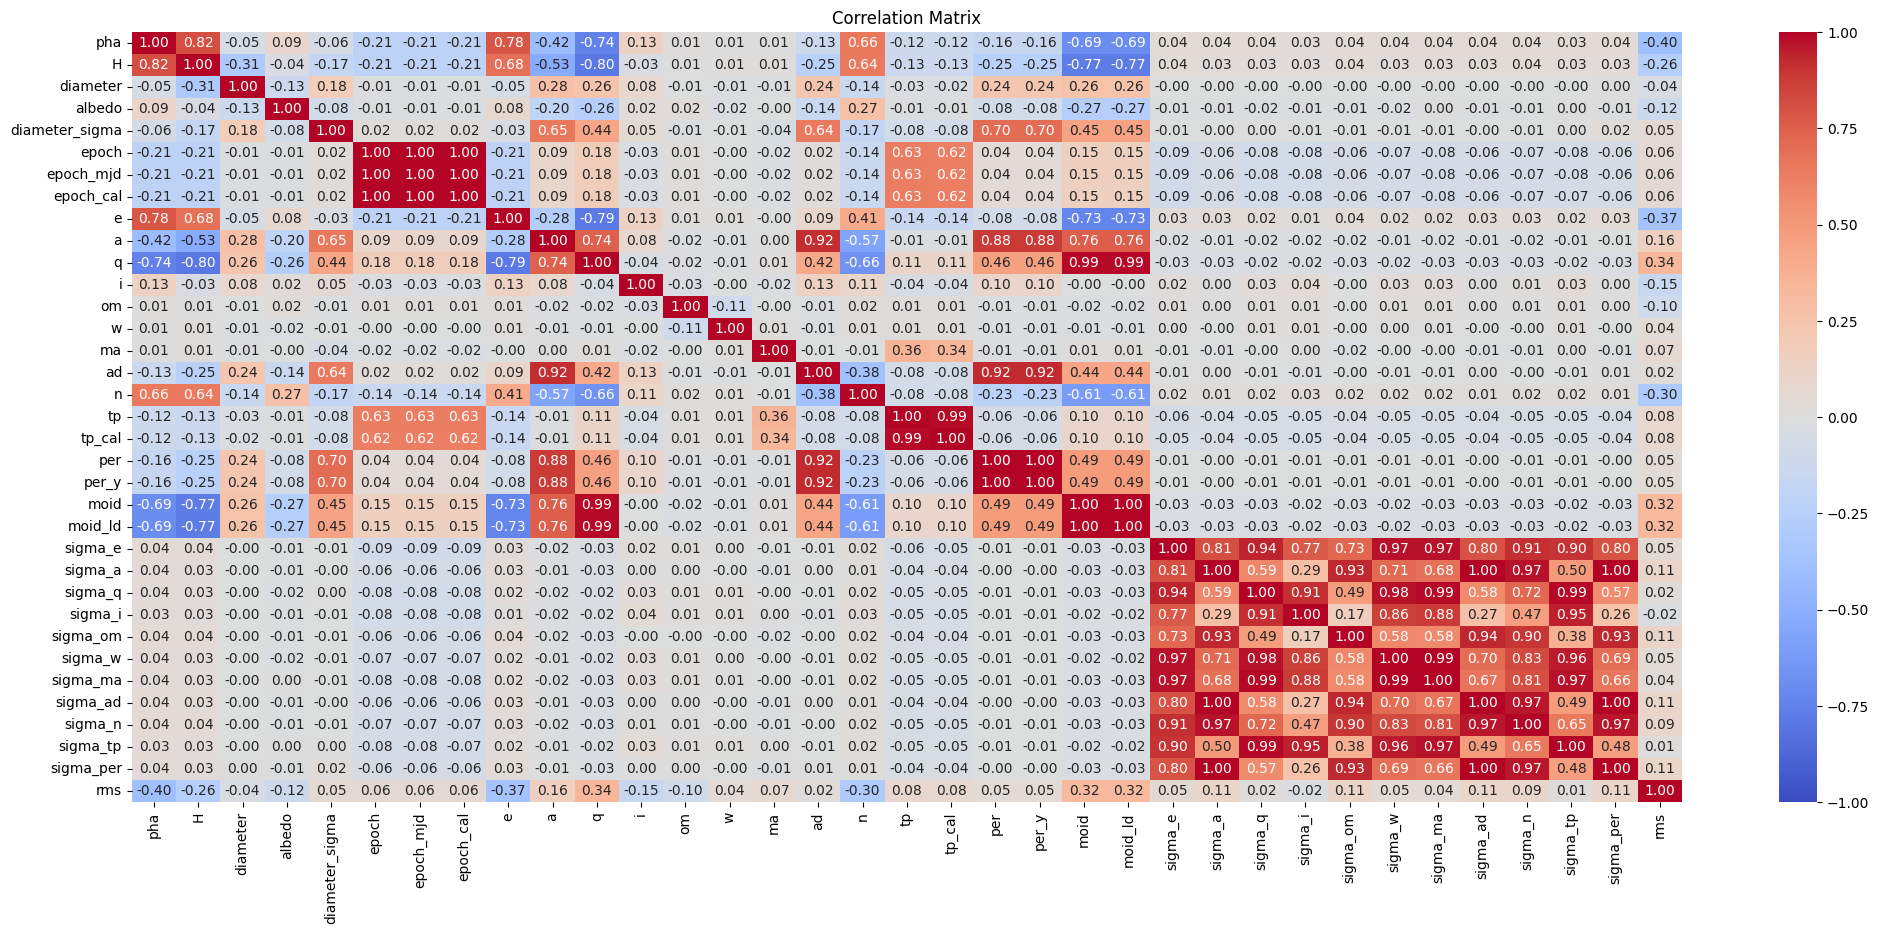

In [36]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_test['pha'] = le.fit_transform(df_test['pha'])

numerical_df = df_test.select_dtypes(include='number')

corr_matrix = numerical_df.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [37]:
#to find highly correlated columns with pha
if 'pha' in numerical_df.columns:
    pha_correlation = numerical_df.corr()['pha'].sort_values(ascending=False)

    threshold = 0.3
    highly_correlated = pha_correlation[abs(pha_correlation) > threshold]

    print("\nHighly Correlated Columns with 'pha':\n")
    print(highly_correlated)
else:
    print("The 'pha' column is not in the dataset.")



Highly Correlated Columns with 'pha':

pha        1.000000
H          0.815230
e          0.781627
n          0.655640
rms       -0.395623
a         -0.417914
moid_ld   -0.694516
moid      -0.694516
q         -0.742662
Name: pha, dtype: float64


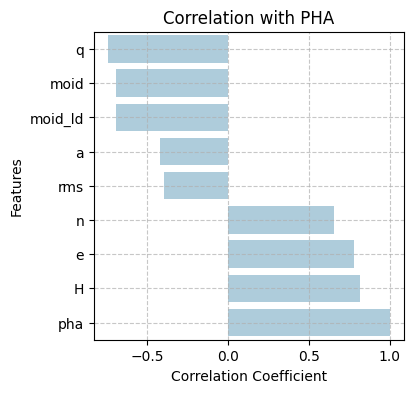

In [38]:
highly_correlated_sorted = highly_correlated.sort_values(ascending=True)

paired_palette = sns.color_palette('Paired')
color = paired_palette[0]

plt.figure(figsize=(4, 4))
sns.barplot(x=highly_correlated_sorted.values, y=highly_correlated_sorted.index, color=color)
plt.title('Correlation with PHA')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


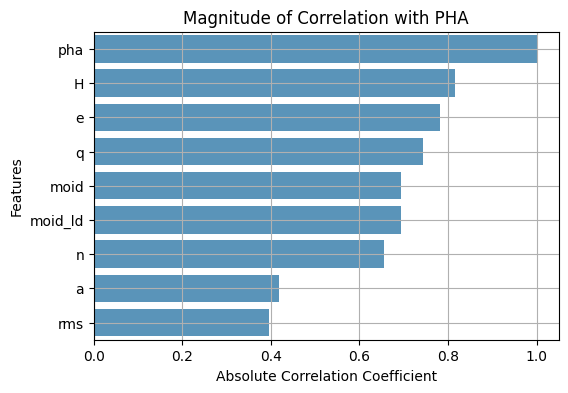

In [39]:
highly_correlated_magnitude = highly_correlated.abs().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=highly_correlated_magnitude.values, y=highly_correlated_magnitude.index, color=sns.color_palette('Blues', as_cmap=True)(0.6))
plt.title('Magnitude of Correlation with PHA')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.grid()
plt.show()


H , e , q , moid , n , a , and rms are highly correlated with pha

In [40]:
target_corr = corr_matrix['pha'].drop('pha')

# Extract and print high correlations (absolute value above a threshold)
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            # Get correlations with the target column 'pha'
            corr_with_target_col1 = target_corr.get(colname1, 0)
            corr_with_target_col2 = target_corr.get(colname2, 0)
            high_corr_pairs.append((colname1, colname2, corr_value, corr_with_target_col1, corr_with_target_col2))

print(f"Highly correlated pairs (absolute correlation > {threshold}):")
for col1, col2, corr_value, corr_with_target_col1, corr_with_target_col2 in high_corr_pairs:
    print(f"{col1} and {col2}: Correlation = {corr_value:.2f}")
    print(f"  {col1} with 'pha': {corr_with_target_col1:.2f}")
    print(f"  {col2} with 'pha': {corr_with_target_col2:.2f}")



Highly correlated pairs (absolute correlation > 0.8):
pha and H: Correlation = 0.82
  pha with 'pha': 0.00
  H with 'pha': 0.82
epoch and epoch_mjd: Correlation = 1.00
  epoch with 'pha': -0.21
  epoch_mjd with 'pha': -0.21
epoch and epoch_cal: Correlation = 1.00
  epoch with 'pha': -0.21
  epoch_cal with 'pha': -0.21
epoch_mjd and epoch_cal: Correlation = 1.00
  epoch_mjd with 'pha': -0.21
  epoch_cal with 'pha': -0.21
a and ad: Correlation = 0.92
  a with 'pha': -0.42
  ad with 'pha': -0.13
a and per: Correlation = 0.88
  a with 'pha': -0.42
  per with 'pha': -0.16
a and per_y: Correlation = 0.88
  a with 'pha': -0.42
  per_y with 'pha': -0.16
q and moid: Correlation = 0.99
  q with 'pha': -0.74
  moid with 'pha': -0.69
q and moid_ld: Correlation = 0.99
  q with 'pha': -0.74
  moid_ld with 'pha': -0.69
ad and per: Correlation = 0.92
  ad with 'pha': -0.13
  per with 'pha': -0.16
ad and per_y: Correlation = 0.92
  ad with 'pha': -0.13
  per_y with 'pha': -0.16
tp and tp_cal: Correlati

**Redundant feature elimination.**

In [41]:
result_df.drop(columns=['tp', 'per_y','moid_ld','epoch_mjd','epoch_cal'],inplace=True)
df_test.drop(columns=['tp', 'per_y','moid_ld','epoch_mjd','epoch_cal'],inplace=True)

In [42]:
result_df.drop(columns=['sigma_ad','sigma_per','sigma_om','sigma_tp','sigma_ma','sigma_e','sigma_i','sigma_q'],inplace=True)
df_test.drop(columns=['sigma_ad','sigma_per','sigma_om','sigma_tp','sigma_ma','sigma_e','sigma_i','sigma_q'],inplace=True)

In [43]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18603 entries, 0 to 18602
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neo             18603 non-null  object 
 1   pha             18603 non-null  object 
 2   H               18603 non-null  float64
 3   diameter        16758 non-null  float64
 4   albedo          16737 non-null  float64
 5   diameter_sigma  16726 non-null  float64
 6   orbit_id        18603 non-null  object 
 7   epoch           18603 non-null  float64
 8   e               18603 non-null  float64
 9   a               18603 non-null  float64
 10  q               18603 non-null  float64
 11  i               18603 non-null  float64
 12  om              18603 non-null  float64
 13  w               18603 non-null  float64
 14  ma              18603 non-null  float64
 15  ad              18603 non-null  float64
 16  n               18603 non-null  float64
 17  tp_cal          18603 non-null 

**Pair Plot**

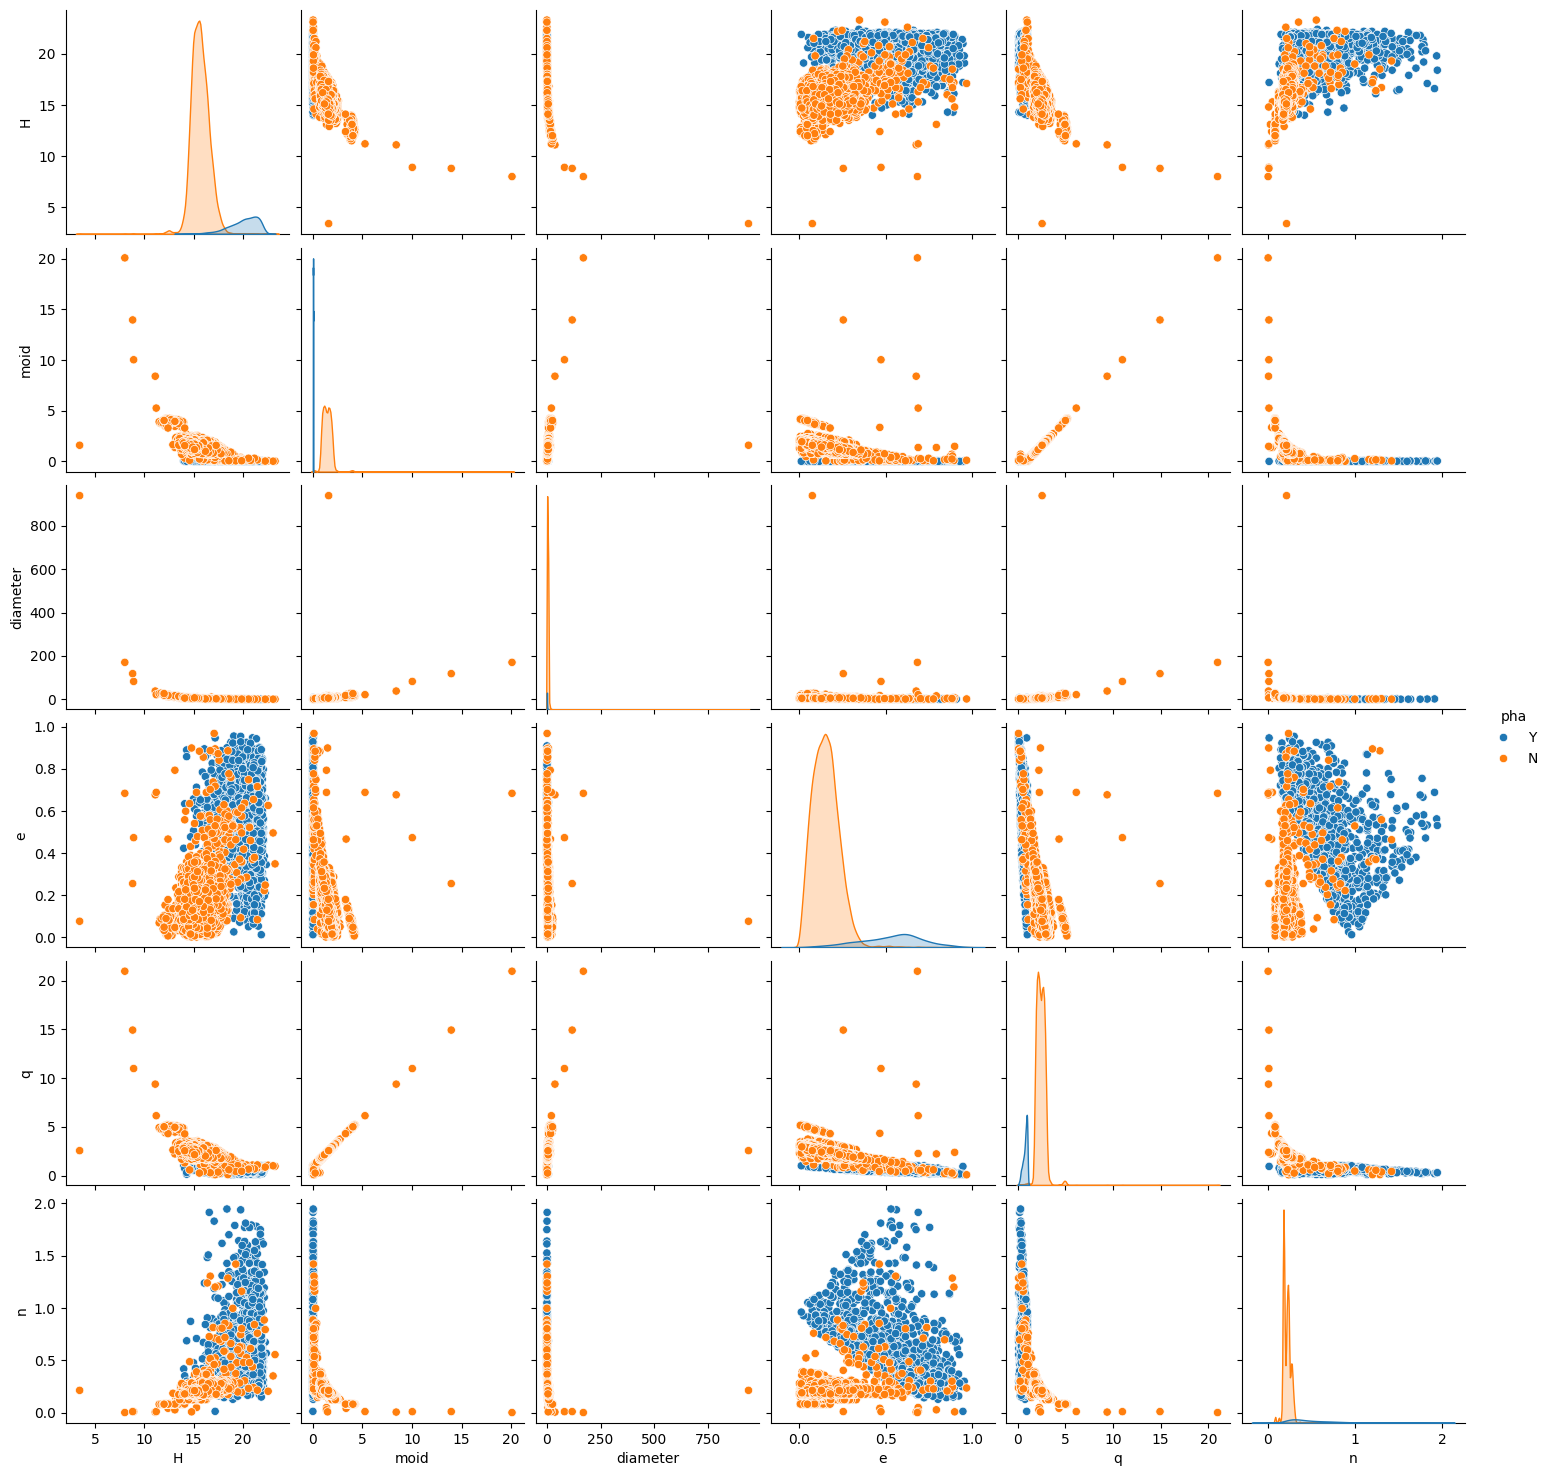

In [44]:
sns.pairplot(result_df, hue='pha', vars=['H', 'moid', 'diameter','e','q','n'])
plt.show()

**Scatter plot**

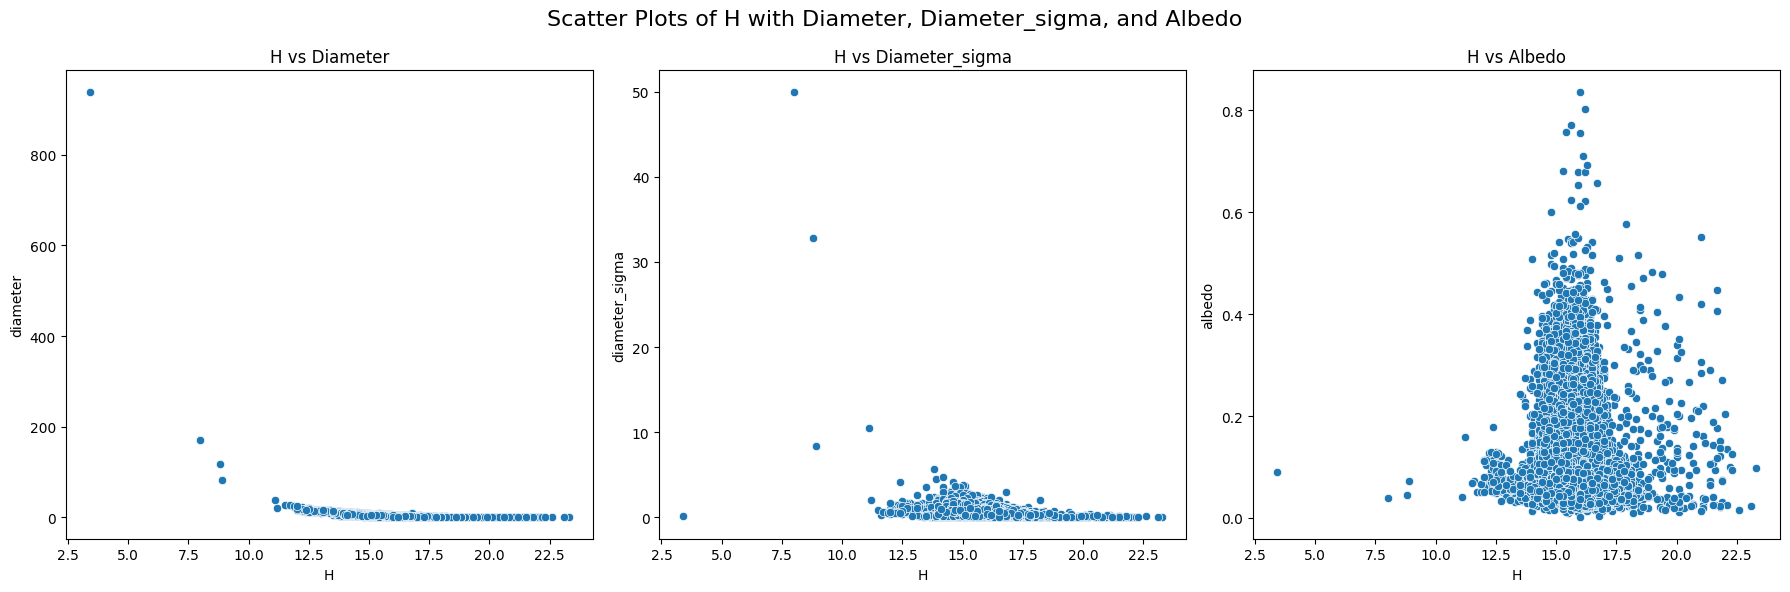

Correlation coefficient between H and Diameter: -0.31263195493111856


In [45]:
df_test = df_test.dropna(subset=['diameter','diameter_sigma','albedo'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='H', y='diameter', data=df_test, ax=axes[0])
axes[0].set_title('H vs Diameter')
correlation = df_test['H'].corr(df_test['diameter'])

sns.scatterplot(x='H', y='diameter_sigma', data=df_test, ax=axes[1])
axes[1].set_title('H vs Diameter_sigma')

sns.scatterplot(x='H', y='albedo', data=df_test, ax=axes[2])
axes[2].set_title('H vs Albedo')

fig.suptitle('Scatter Plots of H with Diameter, Diameter_sigma, and Albedo', fontsize=16)

plt.tight_layout()
plt.show()
print(f"Correlation coefficient between H and Diameter: {correlation}")



> The scatter plot shows a clear inverse relationship between H (Absolute Magnitude) and Diameter. As H increases, the Diameter generally decreases, which aligns with the negative correlation coefficient -0.3.



# Missing value imputation

Since the scatter plot of diameter and H suggests a linear trend (even if weak), missing value imputation using linear Regression can be effective.

In [46]:
df_test.isnull().sum().sum()

0

**Imputation using Linear Regression**

In [47]:

from sklearn.linear_model import LinearRegression

# Fit the model using H to predict diameter
reg = LinearRegression()
reg.fit(df_test[['H']], df_test['diameter'])

# Predict missing diameter values based on H
missing_diameter = result_df[result_df['diameter'].isnull()]
predicted_diameter = reg.predict(missing_diameter[['H']])

result_df.loc[result_df['diameter'].isnull(), 'diameter'] = predicted_diameter


**Histplot**

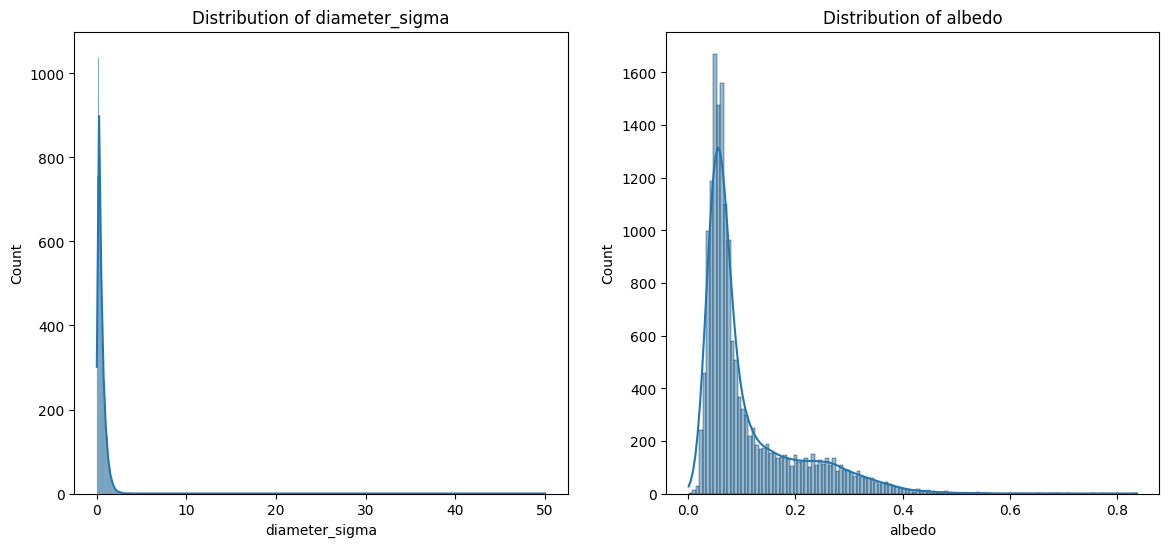

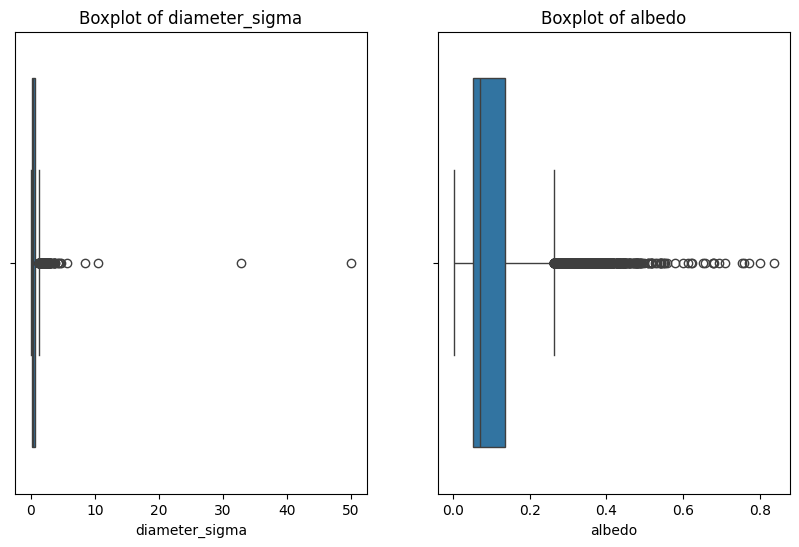

In [48]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_test['diameter_sigma'], kde=True)
plt.title('Distribution of diameter_sigma')

plt.subplot(1, 2, 2)
sns.histplot(df_test['albedo'], kde=True)
plt.title('Distribution of albedo')

plt.show()

# Plot boxplots for diameter_sigma and albedo
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_test['diameter_sigma'])
plt.title('Boxplot of diameter_sigma')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_test['albedo'])
plt.title('Boxplot of albedo')

plt.show()


Distribution is skewd and has outliers.

**Fill with median**

In [49]:
result_df['diameter_sigma'].fillna(result_df['diameter_sigma'].median(), inplace=True)

In [50]:
result_df['albedo'].fillna(result_df['albedo'].median(), inplace=True)

In [51]:
result_df.isnull().sum().sum()

0

**Simplifing the column class**

In [52]:
print(class_pha_y_counts)

class
APO    1768
ATE     174
AMO     118
IEO       6
dtype: int64


In [53]:
retain_classes = ['APO', 'ATE', 'AMO', 'IEO']

result_df['class'] = result_df['class'].apply(lambda x: x if x in retain_classes else 'Other')

new_class_counts = result_df['class'].value_counts()
print(new_class_counts)


class
Other    16447
APO       1817
ATE        182
AMO        151
IEO          6
Name: count, dtype: int64


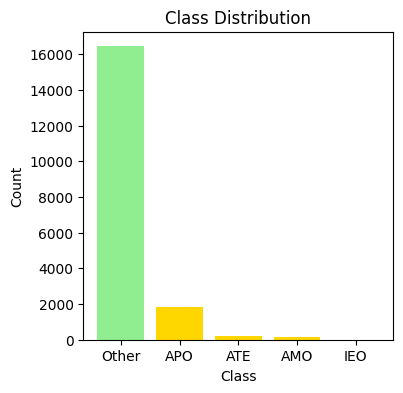

In [54]:
import matplotlib.pyplot as plt

colors = ['gold' if label != 'Other' else 'lightgreen' for label in new_class_counts.index]
plt.figure(figsize=(4,4))
plt.bar(new_class_counts.index, new_class_counts.values, color=colors)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Dropping orbit_id**

In [55]:
droped_orbit_df=result_df.copy()

In [56]:
droped_orbit_df=result_df.drop(['orbit_id'],axis='columns')

In [57]:
droped_orbit_df.shape

(18603, 24)

In [58]:
num_droped_orbit_df=droped_orbit_df.select_dtypes(include=['int64','float64'])
cat_droped_orbit_df=droped_orbit_df.select_dtypes(include=['object'])
print(f"Numerical columns={num_droped_orbit_df.columns}")
print(f"\nCategorical columns={cat_droped_orbit_df.columns}")

Numerical columns=Index(['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp_cal', 'per', 'moid', 'sigma_a',
       'sigma_w', 'sigma_n', 'rms'],
      dtype='object')

Categorical columns=Index(['neo', 'pha', 'class'], dtype='object')


# Encoding

**One-hot encoding**

In [59]:
encoded_df = pd.get_dummies(cat_droped_orbit_df, columns=['class', 'neo'])
print(encoded_df.head())
boolean_columns = encoded_df.columns.drop('pha')
encoded_df[boolean_columns] = encoded_df[boolean_columns].astype(int)
print("\n\n",encoded_df.head())


  pha  class_AMO  class_APO  class_ATE  class_IEO  class_Other  neo_N  neo_Y
0   Y      False       True      False      False        False  False   True
1   Y      False       True      False      False        False  False   True
2   Y      False       True      False      False        False  False   True
3   Y      False       True      False      False        False  False   True
4   Y      False       True      False      False        False  False   True


   pha  class_AMO  class_APO  class_ATE  class_IEO  class_Other  neo_N  neo_Y
0   Y          0          1          0          0            0      0      1
1   Y          0          1          0          0            0      0      1
2   Y          0          1          0          0            0      0      1
3   Y          0          1          0          0            0      0      1
4   Y          0          1          0          0            0      0      1


**Label Encoding**

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_df['pha'] = le.fit_transform(encoded_df['pha'])
encoded_df = encoded_df.astype(int)
print(encoded_df.head())

   pha  class_AMO  class_APO  class_ATE  class_IEO  class_Other  neo_N  neo_Y
0    1          0          1          0          0            0      0      1
1    1          0          1          0          0            0      0      1
2    1          0          1          0          0            0      0      1
3    1          0          1          0          0            0      0      1
4    1          0          1          0          0            0      0      1


Combine encoded_df with numerical features.

In [61]:
combined_df = pd.concat([num_droped_orbit_df, encoded_df], axis=1)
combined_df.head()

,H,diameter,albedo,diameter_sigma,epoch,e,a,q,i,om,w,ma,ad,n,tp_cal,per,moid,sigma_a,sigma_w,sigma_n,rms,pha,class_AMO,class_APO,class_ATE,class_IEO,class_Other,neo_N,neo_Y
0,16.90,1.00,0.51,0.361,2459000.5,0.827021,1.078169,0.186500,22.822113,87.997544,31.393344,192.083181,1.969838,0.880387,2.020121e+07,408.910857,0.034245,2.817900e-09,0.000007,3.451500e-09,0.33228,1,0,1,0,0,0,0,1
1,15.30,2.56,0.29,0.150,2459000.5,0.335455,1.245667,0.827802,13.337043,337.186975,276.956068,235.112642,1.663532,0.708926,2.020112e+07,507.810053,0.030353,1.588400e-10,0.000003,1.355900e-10,0.40639,1,0,1,0,0,0,0,1
2,16.25,1.50,0.25,0.361,2459000.5,0.559917,1.470345,0.647074,6.354732,35.627131,285.975958,88.546479,2.293616,0.552809,2.019122e+07,651.219646,0.025814,8.299600e-10,0.000025,4.680600e-10,0.48568,1,0,1,0,0,0,0,1
3,15.20,3.40,0.07,0.361,2459000.5,0.650352,1.776503,0.621152,39.829591,356.864043,267.822978,312.736110,2.931855,0.416251,2.020092e+07,864.863110,0.003568,2.773900e-09,0.000005,9.749200e-10,0.39337,1,0,1,0,0,0,0,1
4,18.80,0.60,0.07,0.361,2459000.5,0.763997,1.874841,0.442468,1.322476,349.486273,43.608203,336.157322,3.307214,0.383935,2.020080e+07,937.659578,0.011589,1.405300e-09,0.000430,4.316600e-10,0.73830,1,0,1,0,0,0,0,1


In [62]:
combined_df.shape

(18603, 29)

In [63]:
combined_df.columns

Index(['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp_cal', 'per', 'moid', 'sigma_a',
       'sigma_w', 'sigma_n', 'rms', 'pha', 'class_AMO', 'class_APO',
       'class_ATE', 'class_IEO', 'class_Other', 'neo_N', 'neo_Y'],
      dtype='object')

In [64]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18603 entries, 0 to 18602
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   H               18603 non-null  float64
 1   diameter        18603 non-null  float64
 2   albedo          18603 non-null  float64
 3   diameter_sigma  18603 non-null  float64
 4   epoch           18603 non-null  float64
 5   e               18603 non-null  float64
 6   a               18603 non-null  float64
 7   q               18603 non-null  float64
 8   i               18603 non-null  float64
 9   om              18603 non-null  float64
 10  w               18603 non-null  float64
 11  ma              18603 non-null  float64
 12  ad              18603 non-null  float64
 13  n               18603 non-null  float64
 14  tp_cal          18603 non-null  float64
 15  per             18603 non-null  float64
 16  moid            18603 non-null  float64
 17  sigma_a         18603 non-null 

**Splitting into target (y) and features (x)**

In [65]:
x = combined_df.drop('pha', axis=1)
y = combined_df['pha']
x.head()
y.head()

,pha
0,1
1,1
2,1
3,1
4,1


**Train_Test_Split**

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# Handling imbalance

**SMOTETomek**

In [67]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)


In [68]:
from collections import Counter

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 13229, 1: 1653})
Resampled dataset shape: Counter({0: 13097, 1: 13097})


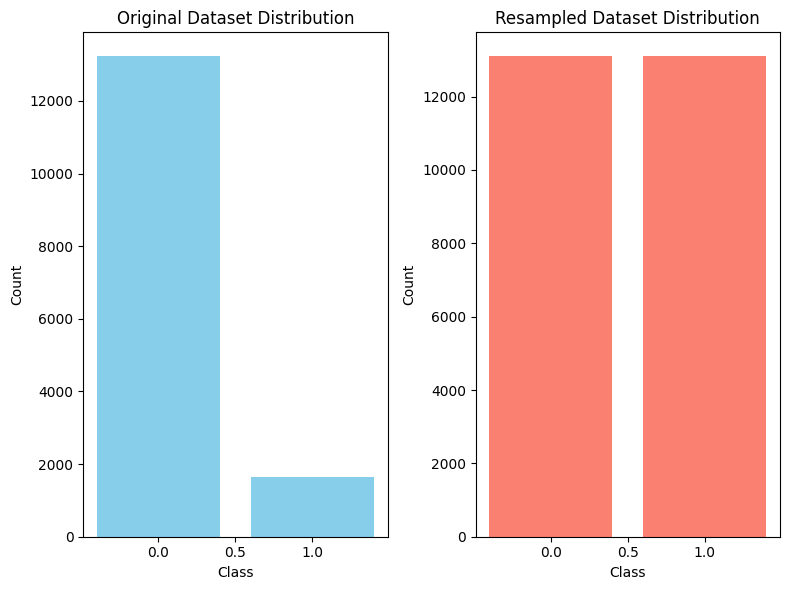

In [69]:
y_train_counts = Counter(y_train)
y_resampled_counts = Counter(y_resampled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

axes[0].bar(y_train_counts.keys(), y_train_counts.values(), color='skyblue')
axes[0].set_title('Original Dataset Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')


axes[1].bar(y_resampled_counts.keys(), y_resampled_counts.values(), color='salmon')
axes[1].set_title('Resampled Dataset Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


# Scaling

Min-Max Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)
x_test = scaler.transform(x_test)

# Model Training And Evaluation

 **Logistic Regression**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

model = LogisticRegression(C=0.001, penalty='l2', random_state=42)
model.fit(X_resampled, y_resampled)
y_pred_lr=model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nF1 Score:", f1_score(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

Confusion Matrix:
 [[3294   14]
 [   0  413]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3308
           1       0.97      1.00      0.98       413

    accuracy                           1.00      3721
   macro avg       0.98      1.00      0.99      3721
weighted avg       1.00      1.00      1.00      3721


F1 Score: 0.9833333333333333
Accuracy: 0.9962375705455523
Precision: 0.9672131147540983
Recall: 1.0


**DecisionTree**

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred_dt=model.predict(x_test)

print("Train Accuracy\n")
y_pred_train=model.predict(X_resampled)
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_train))
print("\nClassification Report:\n", classification_report(y_resampled, y_pred_train))
print("Accuracy:", accuracy_score(y_resampled, y_pred_train))

print("\n\n\nTest Accuracy")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nF1 Score:", f1_score(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

Train Accuracy

Confusion Matrix:
 [[13097     0]
 [    0 13097]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13097
           1       1.00      1.00      1.00     13097

    accuracy                           1.00     26194
   macro avg       1.00      1.00      1.00     26194
weighted avg       1.00      1.00      1.00     26194

Accuracy: 1.0



Test Accuracy
Confusion Matrix:
 [[3308    0]
 [   1  412]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3308
           1       1.00      1.00      1.00       413

    accuracy                           1.00      3721
   macro avg       1.00      1.00      1.00      3721
weighted avg       1.00      1.00      1.00      3721


F1 Score: 0.9987878787878788
Accuracy: 0.999731255038968
Precision: 1.0
Recall: 0.9975786924939467


**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(x_test)

print("Train Accuracy\n\n")
y_pred_train_rf=rf_model.predict(X_resampled)
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_train_rf))
print("\nClassification Report:\n", classification_report(y_resampled, y_pred_train_rf))
print("Accuracy:", accuracy_score(y_resampled, y_pred_train_rf))
print("Precision:", precision_score(y_resampled, y_pred_train_rf))
print("Recall:", recall_score(y_resampled, y_pred_train_rf))

print("\n\nTest Accuracy\n\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nF1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

Train Accuracy


Confusion Matrix:
 [[13097     0]
 [    0 13097]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13097
           1       1.00      1.00      1.00     13097

    accuracy                           1.00     26194
   macro avg       1.00      1.00      1.00     26194
weighted avg       1.00      1.00      1.00     26194

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Test Accuracy


Confusion Matrix:
 [[3308    0]
 [   0  413]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3308
           1       1.00      1.00      1.00       413

    accuracy                           1.00      3721
   macro avg       1.00      1.00      1.00      3721
weighted avg       1.00      1.00      1.00      3721


F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


**XGboost**

In [74]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=10, random_state=42, n_estimators=100, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nF1 Score:", f1_score(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))

Confusion Matrix:
 [[3308    0]
 [   1  412]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3308
           1       1.00      1.00      1.00       413

    accuracy                           1.00      3721
   macro avg       1.00      1.00      1.00      3721
weighted avg       1.00      1.00      1.00      3721


F1 Score: 0.9987878787878788
Accuracy: 0.999731255038968
Precision: 1.0
Recall: 0.9975786924939467


Checking accuracy for both train and test sets to ensure it's **not overfitted**.

**Cross Validation**

In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=2, scoring='f1')

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.99961835 1.        ]
Mean CV F1 score: 0.9998091748721472
